In [77]:
#--- imports for data preprocessing
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from google.colab import files
from sklearn.preprocessing import OneHotEncoder

In [45]:
file_url = '/content/drive/MyDrive/data_mining_project/autoscout24_scraped_data.csv'
data = pd.read_csv(file_url)
data

,GUID,Make,Model,Mileage,Price,First Registration,Fuel Type,Seller
0,4b5f723a-8cee-4fcc-9a03-baebe0b75b8a,audi,a4,"182,707 km","€ 4,950.-",09/2008,Gasoline,Autohandel Honing
1,4e9f026d-b6d6-4f1a-8f09-5c8407ea4f68,audi,a4,"273,250 km","€ 8,400.-",06/2013,Diesel,Auto Centrum Bommelerwaard
2,c7609b24-a5e1-4280-9557-9e284f18310d,audi,tt,"137,528 km","€ 7,900.-",04/2008,Gasoline,PGN bvba
3,52623fae-552d-4ea1-8a10-7061ee8d27cb,audi,q3,"4,043 km","€ 39,900.-",06/2024,Gasoline,Yprauto
4,c92ee042-4660-46f4-97f0-77313ba55020,audi,a8,"175,144 km","€ 9,999.-",01/2009,Diesel,Garage des Chaufours SRL
...,...,...,...,...,...,...,...,...
6970,8582b3c3-22d4-4887-8d5c-c44ada9b0c7c,toyota,yaris,"14,910 km","€ 20,495.-",12/2022,Electric/Gasoline,Gego sa
6971,178f3a47-0266-47ac-bbd8-7cf968dcdf25,toyota,aygo x,"3,877 km","€ 17,899.-",06/2023,Gasoline,Van Mossel Opel Mechelen
6972,ffe43899-3a55-406a-941a-0d0244d40742,toyota,yaris,"1,300 km","€ 21,600.-",06/2024,Electric/Gasoline,Duegi Car Srl
6973,3f1cb7b5-22c8-484c-8f7b-286e908e4948,toyota,yaris cross,"30,220 km","€ 23,910.-",04/2022,Electric/Gasoline,Toyota Autohaus J. Reith GmbH


In [46]:
print(f"The length of the whole dataset is: {len(data)}")
print(f"The number of unique rows in the dataset is {len(data['GUID'].unique())}")

The length of the whole dataset is: 6975
The number of unique rows in the dataset is 6682


In [47]:
data = data.drop_duplicates(subset=['GUID'])

In [48]:
print(f"The length of unique GUIDs is {len(data['GUID'].unique())} and the length of the dataframe is {len(data)}.")

The length of unique GUIDs is 6682 and the length of the dataframe is 6682.


In [49]:
data = data.drop(columns=['Seller', 'GUID'])

In [50]:
data = data.rename(columns={'Make':'Brand'})

In [51]:
data

,Brand,Model,Mileage,Price,First Registration,Fuel Type
0,audi,a4,"182,707 km","€ 4,950.-",09/2008,Gasoline
1,audi,a4,"273,250 km","€ 8,400.-",06/2013,Diesel
2,audi,tt,"137,528 km","€ 7,900.-",04/2008,Gasoline
3,audi,q3,"4,043 km","€ 39,900.-",06/2024,Gasoline
4,audi,a8,"175,144 km","€ 9,999.-",01/2009,Diesel
...,...,...,...,...,...,...
6970,toyota,yaris,"14,910 km","€ 20,495.-",12/2022,Electric/Gasoline
6971,toyota,aygo x,"3,877 km","€ 17,899.-",06/2023,Gasoline
6972,toyota,yaris,"1,300 km","€ 21,600.-",06/2024,Electric/Gasoline
6973,toyota,yaris cross,"30,220 km","€ 23,910.-",04/2022,Electric/Gasoline


In [52]:
def remove_km(mileage):
    return mileage[:-2]

data['Mileage'] = data['Mileage'].apply(remove_km)

In [53]:
def remove_e(price):
    return price[2:-2]

data['Price'] = data['Price'].apply(remove_e)

In [54]:
data

,Brand,Model,Mileage,Price,First Registration,Fuel Type
0,audi,a4,"182,707","4,950",09/2008,Gasoline
1,audi,a4,"273,250","8,400",06/2013,Diesel
2,audi,tt,"137,528","7,900",04/2008,Gasoline
3,audi,q3,"4,043","39,900",06/2024,Gasoline
4,audi,a8,"175,144","9,999",01/2009,Diesel
...,...,...,...,...,...,...
6970,toyota,yaris,"14,910","20,495",12/2022,Electric/Gasoline
6971,toyota,aygo x,"3,877","17,899",06/2023,Gasoline
6972,toyota,yaris,"1,300","21,600",06/2024,Electric/Gasoline
6973,toyota,yaris cross,"30,220","23,910",04/2022,Electric/Gasoline


In [55]:
current_year = datetime.now().year
current_month = datetime.now().month

def calculate_age(registration_date):
    try:
        month, year = map(int, registration_date.split('/'))
        age = current_year - year - ((current_month - month) < 0)
        return age
    except (ValueError, AttributeError):
        return None

data['Car Age'] = data['First Registration'].apply(calculate_age)
data = data.drop(columns=['First Registration'])
data

,Brand,Model,Mileage,Price,Fuel Type,Car Age
0,audi,a4,"182,707","4,950",Gasoline,16.0
1,audi,a4,"273,250","8,400",Diesel,11.0
2,audi,tt,"137,528","7,900",Gasoline,16.0
3,audi,q3,"4,043","39,900",Gasoline,0.0
4,audi,a8,"175,144","9,999",Diesel,15.0
...,...,...,...,...,...,...
6970,toyota,yaris,"14,910","20,495",Electric/Gasoline,1.0
6971,toyota,aygo x,"3,877","17,899",Gasoline,1.0
6972,toyota,yaris,"1,300","21,600",Electric/Gasoline,0.0
6973,toyota,yaris cross,"30,220","23,910",Electric/Gasoline,2.0


<Axes: >

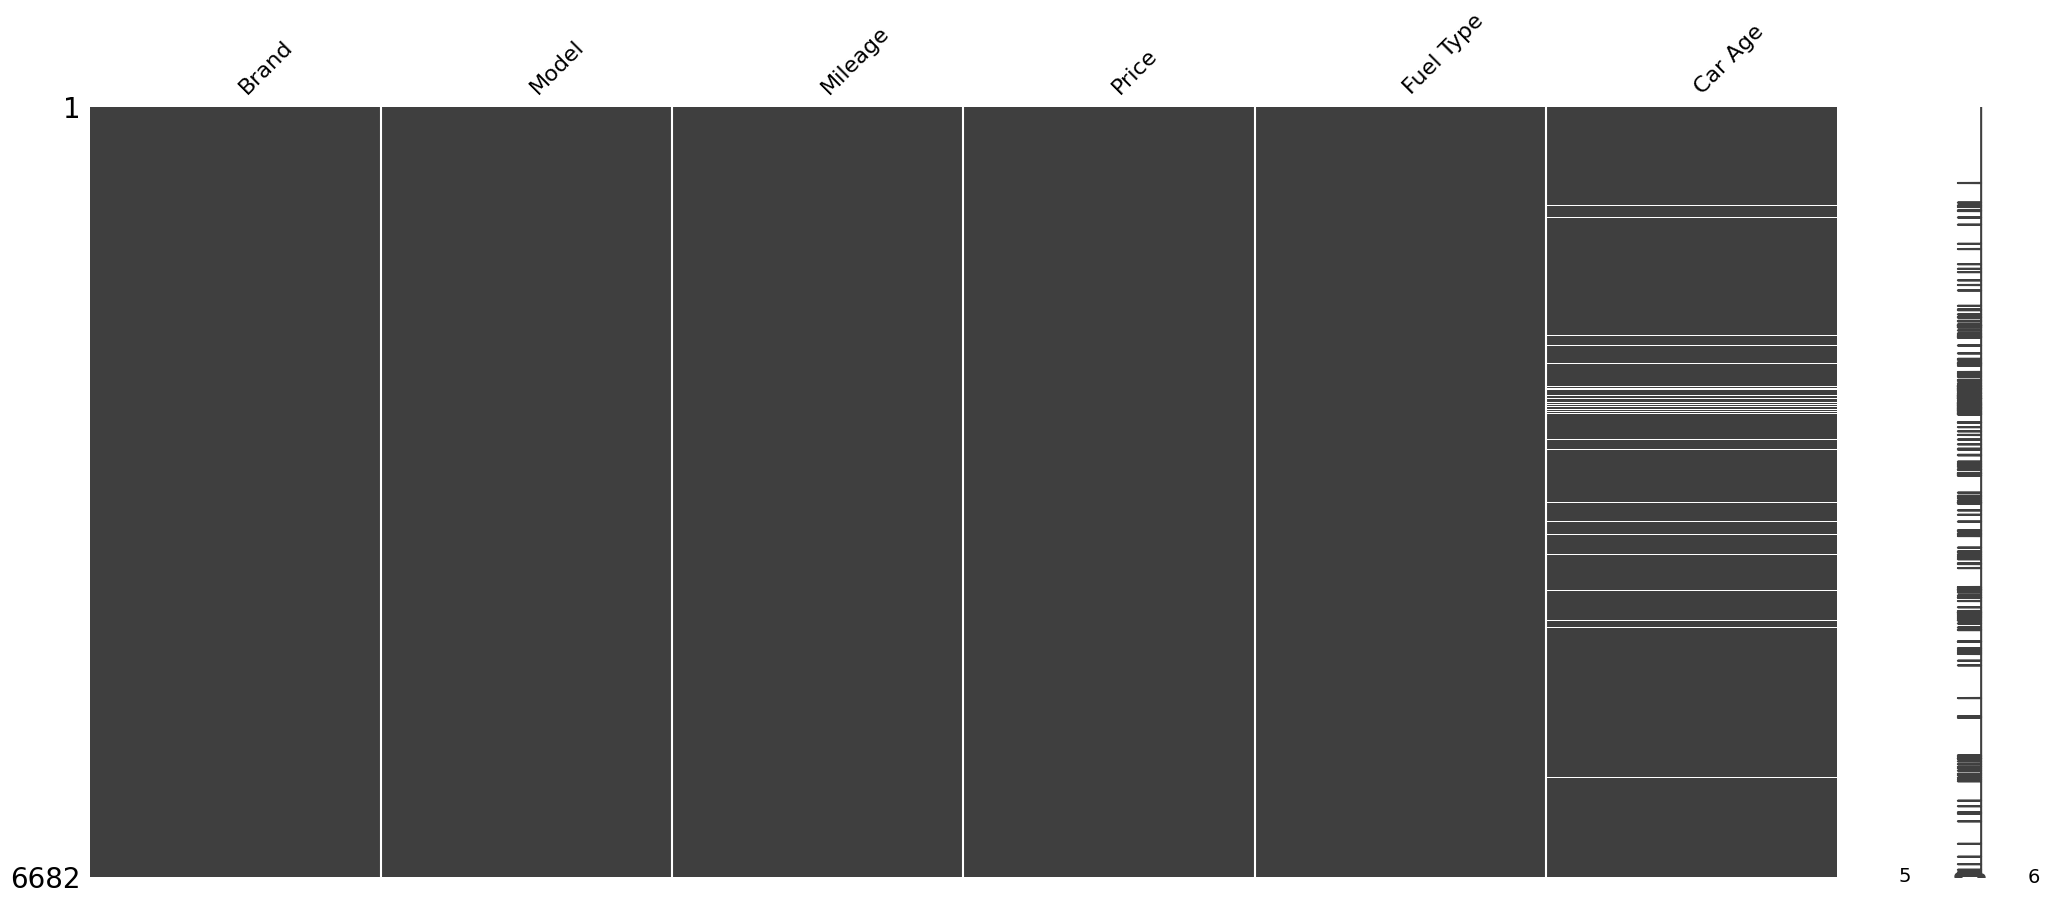

In [56]:
msno.matrix(data)

In [57]:
data['Car Age'].isnull().sum()

281

In [58]:
data=data.dropna(subset=['Car Age'])

<Axes: >

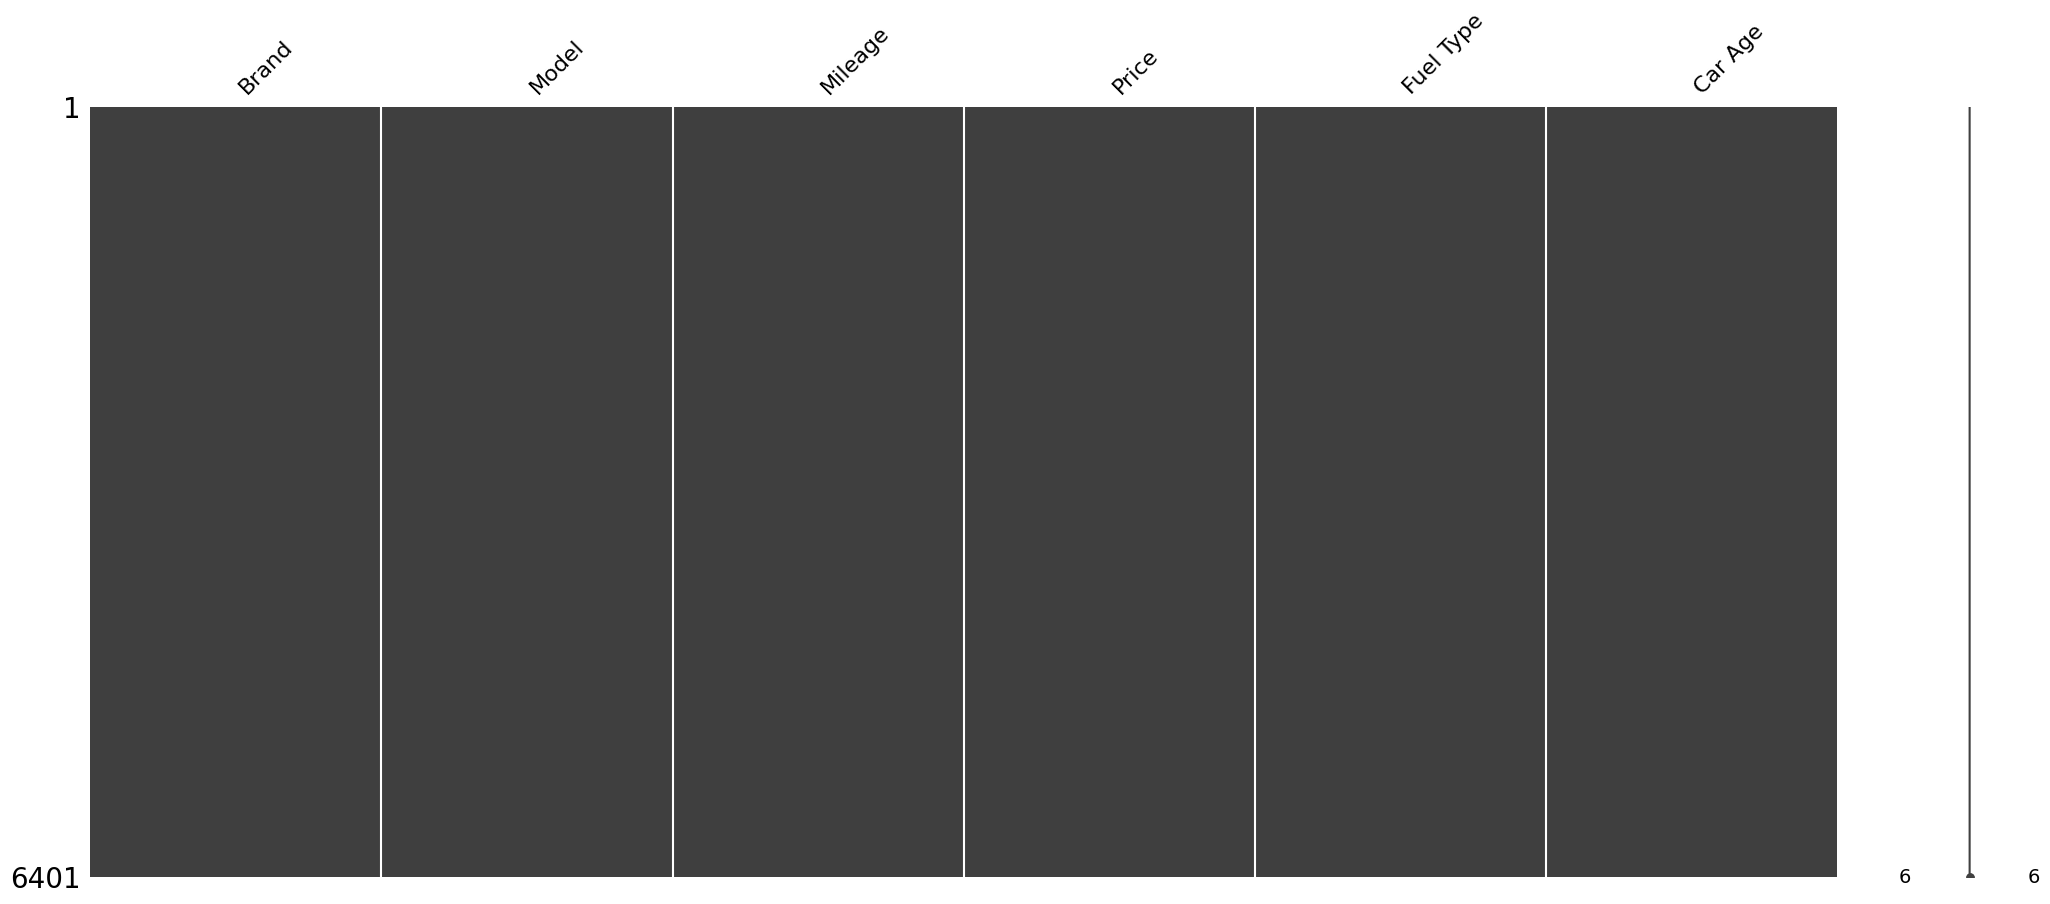

In [59]:
msno.matrix(data)

In [60]:
data['Fuel Type'].unique()

array(['Gasoline', 'Diesel', 'Electric/Gasoline', '- Fuel type', 'Others',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Hydrogen'],
      dtype=object)

In [61]:
data['Fuel Type'].isin(['Others', '- Fuel type']).sum()

17

In [62]:
data = data[data['Fuel Type'].isin(['- Fuel type', 'Others']) == False]

In [63]:
fuel_encoder = LabelEncoder()
data['Fuel Type'] = fuel_encoder.fit_transform(data['Fuel Type'])
data

<ipython-input-63-7a7fa898e57e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fuel Type'] = fuel_encoder.fit_transform(data['Fuel Type'])


,Brand,Model,Mileage,Price,Fuel Type,Car Age
0,audi,a4,"182,707","4,950",5,16.0
1,audi,a4,"273,250","8,400",1,11.0
2,audi,tt,"137,528","7,900",5,16.0
3,audi,q3,"4,043","39,900",5,0.0
4,audi,a8,"175,144","9,999",1,15.0
...,...,...,...,...,...,...
6970,toyota,yaris,"14,910","20,495",4,1.0
6971,toyota,aygo x,"3,877","17,899",5,1.0
6972,toyota,yaris,"1,300","21,600",4,0.0
6973,toyota,yaris cross,"30,220","23,910",4,2.0


In [72]:
data.to_csv('/content/drive/MyDrive/data_mining_project/preprocessed.csv', index=False)

In [73]:
files.download('/content/drive/MyDrive/data_mining_project/preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## OneHot Encoding
In this part of the project I am going to use OneHotEncoder model to encode the columns Brand and Model. For the purpose of this project this method I found this method of encoding the values isv most suitable.

In [81]:
data = pd.read_csv('/content/drive/MyDrive/data_mining_project/preprocessed.csv')
data

,Unnamed: 0,Brand,Model,Mileage,Price,Fuel Type,Car Age
0,0,audi,a4,"182,707","4,950",5,16.0
1,1,audi,a4,"273,250","8,400",1,11.0
2,2,audi,tt,"137,528","7,900",5,16.0
3,3,audi,q3,"4,043","39,900",5,0.0
4,4,audi,a8,"175,144","9,999",1,15.0
...,...,...,...,...,...,...,...
6379,6970,toyota,yaris,"14,910","20,495",4,1.0
6380,6971,toyota,aygo x,"3,877","17,899",5,1.0
6381,6972,toyota,yaris,"1,300","21,600",4,0.0
6382,6973,toyota,yaris cross,"30,220","23,910",4,2.0


In [82]:
data = data.drop(columns=['Unnamed: 0'])

In [83]:
data

,Brand,Model,Mileage,Price,Fuel Type,Car Age
0,audi,a4,"182,707","4,950",5,16.0
1,audi,a4,"273,250","8,400",1,11.0
2,audi,tt,"137,528","7,900",5,16.0
3,audi,q3,"4,043","39,900",5,0.0
4,audi,a8,"175,144","9,999",1,15.0
...,...,...,...,...,...,...
6379,toyota,yaris,"14,910","20,495",4,1.0
6380,toyota,aygo x,"3,877","17,899",5,1.0
6381,toyota,yaris,"1,300","21,600",4,0.0
6382,toyota,yaris cross,"30,220","23,910",4,2.0


In [86]:
brand_encoder = OneHotEncoder(sparse=False)
brand_encoded = brand_encoder.fit_transform(data[['Brand']])
brand_encoded_df = pd.DataFrame(brand_encoded, columns=brand_encoder.get_feature_names_out(['Brand']))
data_encoded = pd.concat([data.drop(['Brand'], axis=1), brand_encoded_df], axis=1)
data = data_encoded
print(data)

            Model   Mileage   Price  Fuel Type  Car Age  Brand_alfa romeo  \
0              a4  182,707    4,950          5     16.0               0.0   
1              a4  273,250    8,400          1     11.0               0.0   
2              tt  137,528    7,900          5     16.0               0.0   
3              q3    4,043   39,900          5      0.0               0.0   
4              a8  175,144    9,999          1     15.0               0.0   
...           ...       ...     ...        ...      ...               ...   
6379        yaris   14,910   20,495          4      1.0               0.0   
6380       aygo x    3,877   17,899          5      1.0               0.0   
6381        yaris    1,300   21,600          4      0.0               0.0   
6382  yaris cross   30,220   23,910          4      2.0               0.0   
6383        rav 4   76,560   25,330          4      5.0               0.0   

      Brand_audi  Brand_bmw  Brand_chevrolet  Brand_citroen  ...  Brand_ope

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [90]:
model_encoder = OneHotEncoder(sparse=False)
model_encoded = model_encoder.fit_transform(data_encoded[['Model']])
model_encoded_df = pd.DataFrame(model_encoded, columns=model_encoder.get_feature_names_out(['Model']))
data_encoded = pd.concat([data_encoded.drop(['Model'], axis=1), model_encoded_df], axis=1)
data = data_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [91]:
data

,Mileage,Price,Fuel Type,Car Age,Brand_alfa romeo,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_citroen,Brand_dacia,...,Model_xceed,Model_xsara picasso,Model_yaris,Model_yaris cross,Model_yeti,Model_z4,Model_zafira,Model_zafira tourer,Model_zoe,Model_zr-v
0,"182,707","4,950",5,16.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"273,250","8,400",1,11.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"137,528","7,900",5,16.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"4,043","39,900",5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"175,144","9,999",1,15.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,"14,910","20,495",4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6380,"3,877","17,899",5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6381,"1,300","21,600",4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6382,"30,220","23,910",4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
data.to_csv('/content/drive/MyDrive/data_mining_project/data_encoded.csv')

In [93]:
files.download('/content/drive/MyDrive/data_mining_project/data_encoded.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>